In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
automobile_df = pd.read_csv('datasets/auto-mpg-processed.csv')

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,49
1,15.0,8,350.0,165,3693,11.5,49
2,18.0,8,318.0,150,3436,11.0,49
3,16.0,8,304.0,150,3433,12.0,49
4,17.0,8,302.0,140,3449,10.5,49


In [3]:
result_dict = {}

In [4]:
def build_model(regression_fn,                
                name_of_y_col, 
                names_of_x_cols, 
                dataset, 
                test_frac=0.2,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    if preprocess_fn is not None:
        X = preprocess_fn(X)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Training_score : " , model.score(x_train, y_train))
    print("Test_score : ", r2_score(y_test, y_pred))

    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        
        plt.ylabel(name_of_y_col)

        plt.legend()
        plt.show()

    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        
        plt.legend(['Predicted line','Observed data'])
        plt.show()
    
    return {
            'training_score': model.score(x_train, y_train),
            'test_score': r2_score(y_test, y_pred)
           }     

In [5]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['test_score'])
        print()

In [6]:
def linear_reg(x_train, y_train):
    model = LinearRegression(normalize=True)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.6998818429304218
Test_score :  0.6566263104347567


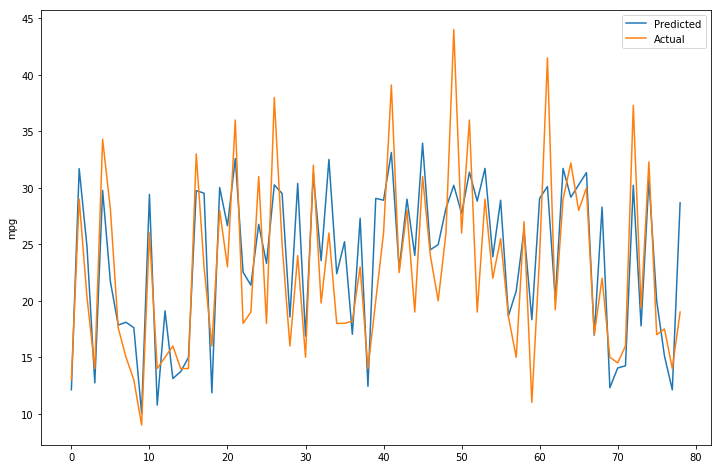

In [7]:
result_dict['mpg ~ single_linear'] = build_model(linear_reg,
                                                 'mpg',
                                                ['weight'],
                                                  automobile_df,
                                                  show_plot_Y=True)

Training_score :  0.7083919458775023
Test_score :  0.6800374445411652


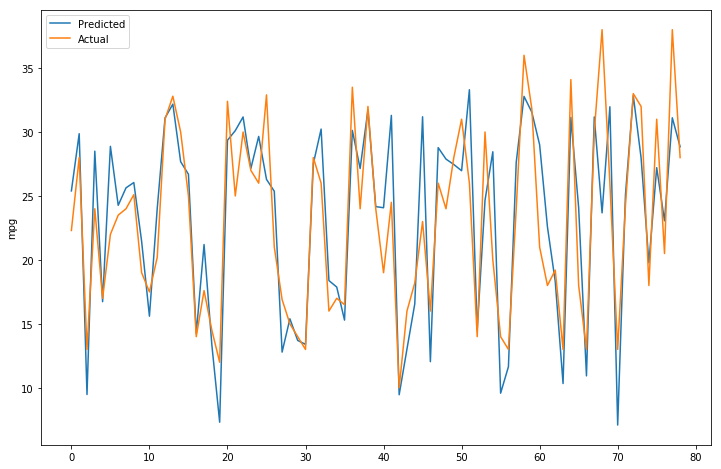

In [8]:
result_dict['mpg ~ kitchen_sink_linear'] = build_model(linear_reg,
                                                      'mpg',
                                                     ['cylinders',
                                                      'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration'],
                                                      automobile_df,
                                                      show_plot_Y=True)

Training_score :  0.6943283582192694
Test_score :  0.7557709356774329


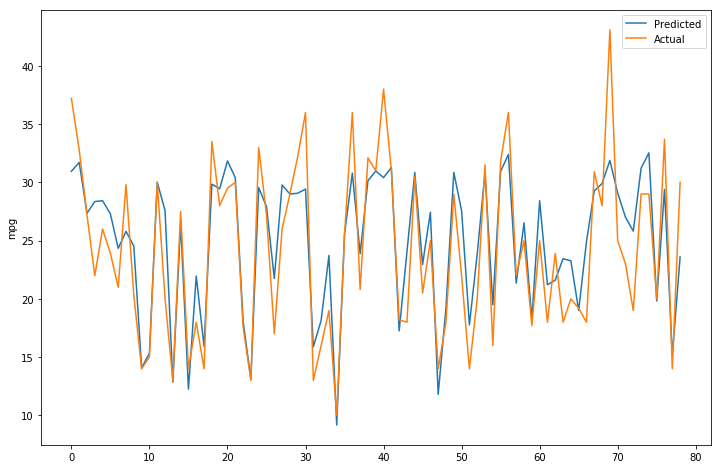

In [9]:
result_dict['mpg ~ parsimonius_linear'] = build_model(linear_reg,
                                                      'mpg',
                                                    ['horsepower',
                                                     'weight'],
                                                      automobile_df,
                                                      show_plot_Y=True)

In [10]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6998818429304218
Test score 0.6566263104347567

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7083919458775023
Test score 0.6800374445411652

Regression:  mpg ~ parsimonius_linear
Training score 0.6943283582192694
Test score 0.7557709356774329



In [13]:
def lasso_reg(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7019188409673598
Test_score :  0.7240164993308392


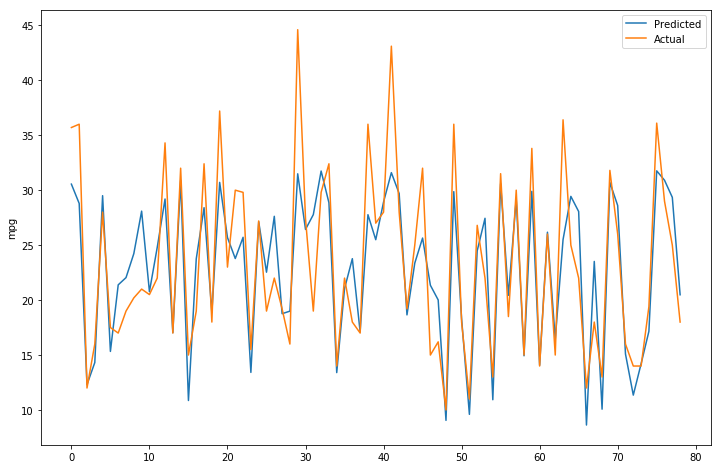

In [14]:
result_dict['mpg ~ kitchen_sink_lasso'] = build_model(lasso_reg,
                                                     'mpg',
                                                    ['cylinders',
                                                     'displacement',
                                                     'horsepower',
                                                     'weight',
                                                     'acceleration'],
                                                      automobile_df,
                                                      show_plot_Y=True)

In [15]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6998818429304218
Test score 0.6566263104347567

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7083919458775023
Test score 0.6800374445411652

Regression:  mpg ~ parsimonius_linear
Training score 0.6943283582192694
Test score 0.7557709356774329

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7019188409673598
Test score 0.7240164993308392



In [17]:
def ridge_reg(x_train, y_train, alpha=0.5, normalize=True):
    model = Ridge(alpha=alpha, normalize=normalize)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.6821859621209236
Test_score :  0.7087581864548806


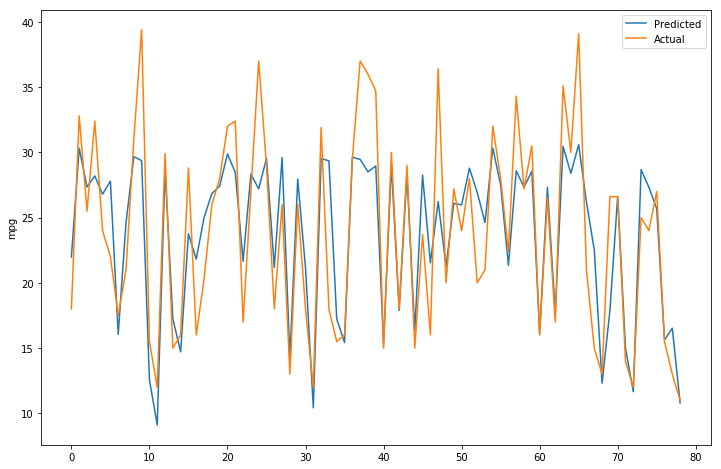

In [18]:
result_dict['mpg ~ kitchen_sink_ridge'] = build_model(ridge_reg,
                                                      'mpg',
                                                     ['cylinders',
                                                      'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration'],
                                                       automobile_df,
                                                       show_plot_Y=True)

In [19]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6998818429304218
Test score 0.6566263104347567

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7083919458775023
Test score 0.6800374445411652

Regression:  mpg ~ parsimonius_linear
Training score 0.6943283582192694
Test score 0.7557709356774329

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7019188409673598
Test score 0.7240164993308392

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6821859621209236
Test score 0.7087581864548806



In [20]:
def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5, 
                    normalize=False, max_iter=100000, warm_start=True, equivalent_to="Elastic Net"):

    print("Equivalent to:", equivalent_to)
    
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, 
                       normalize=normalize, max_iter=max_iter, warm_start=warm_start)
    model.fit(x_train, y_train)

    return model

Equivalent to: OLS
Training_score :  0.7057812310724829
Test_score :  0.707264924261483


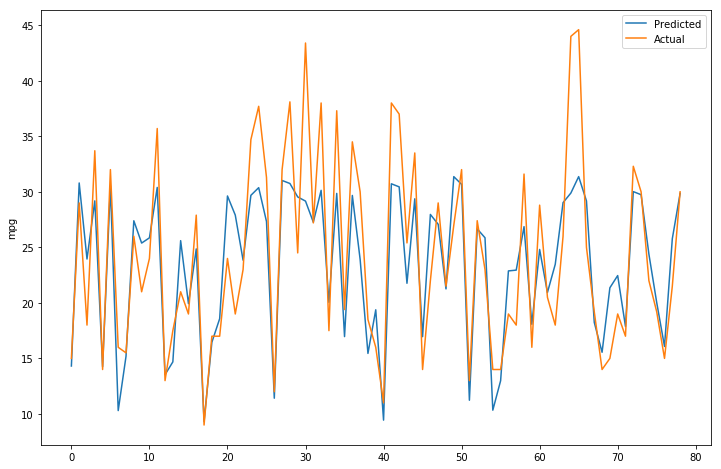

In [21]:
from functools import partial

## This generates a warning which says will not converge
result_dict['mpg ~ kitchen_sink_elastic_net_ols'] = build_model(partial(elastic_net_reg, 
                                                                        alpha=0, equivalent_to="OLS"),
                                                               'mpg',
                                                              ['cylinders',
                                                               'displacement',
                                                               'horsepower',
                                                               'weight',
                                                               'acceleration'],
                                                                automobile_df,
                                                                show_plot_Y=True)

Equivalent to: Lasso
Training_score :  0.7104051004486713
Test_score :  0.691412951415717


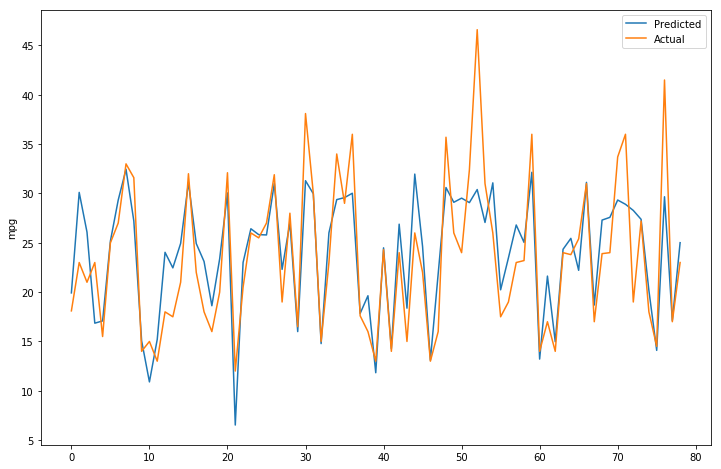

In [22]:
result_dict['mpg ~ kitchen_sink_elastic_net_lasso'] = build_model(partial(elastic_net_reg, alpha=1, 
                                                                    l1_ratio=0, equivalent_to="Lasso"),
                                                                  'mpg',
                                                                 ['cylinders',
                                                                  'displacement',
                                                                  'horsepower',
                                                                  'weight',
                                                                  'acceleration'],
                                                                   automobile_df,
                                                                   show_plot_Y=True)

Equivalent to: Ridge
Training_score :  0.7110011551958635
Test_score :  0.6852537063850218


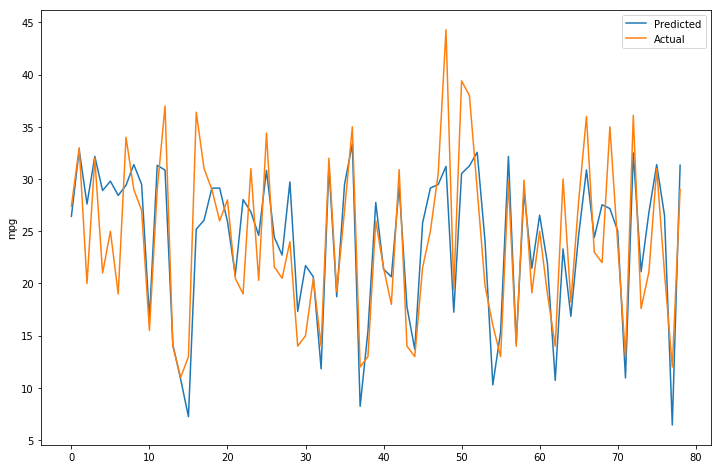

In [23]:
result_dict['mpg ~ kitchen_sink_elastic_net_ridge'] = build_model(partial(elastic_net_reg, alpha=1, 
                                                                    l1_ratio=1, equivalent_to="Ridge"),
                                                                  'mpg',
                                                                 ['cylinders',
                                                                  'displacement',
                                                                  'horsepower',
                                                                  'weight',
                                                                  'acceleration'],
                                                                   automobile_df,
                                                                   show_plot_Y=True)

Equivalent to: Elastic Net
Training_score :  0.7100349396127534
Test_score :  0.6870510109148271


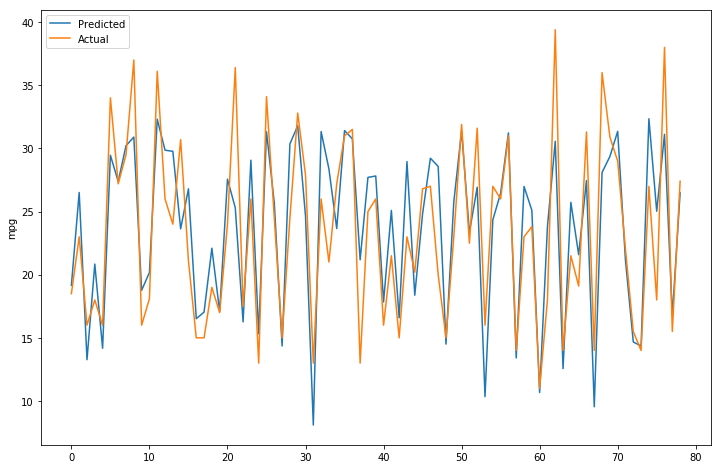

In [24]:
result_dict['mpg ~ kitchen_sink_elastic_net'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=0.5),
                                                            'mpg',
                                                          [ 'cylinders',
                                                            'displacement',
                                                            'horsepower',
                                                            'weight',
                                                            'acceleration'],
                                                            automobile_df,
                                                            show_plot_Y=True)

In [25]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6998818429304218
Test score 0.6566263104347567

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7083919458775023
Test score 0.6800374445411652

Regression:  mpg ~ parsimonius_linear
Training score 0.6943283582192694
Test score 0.7557709356774329

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7019188409673598
Test score 0.7240164993308392

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6821859621209236
Test score 0.7087581864548806

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7057812310724829
Test score 0.707264924261483

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7104051004486713
Test score 0.691412951415717

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7110011551958635
Test score 0.6852537063850218

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.7100349396127534
Test score 0.6870510109148271



### For SVR regression with larger datasets this alternate implementations is preferred

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR

* Uses a different library for implementation
* More flexibility with choice of penalties
* Scales to larger datasets

In [26]:
def svr_reg(x_train, y_train, kernel='linear', epsilon=0.05, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train,y_train)
    
    return model

Training_score :  0.6986316846950715
Test_score :  0.7171401197031876


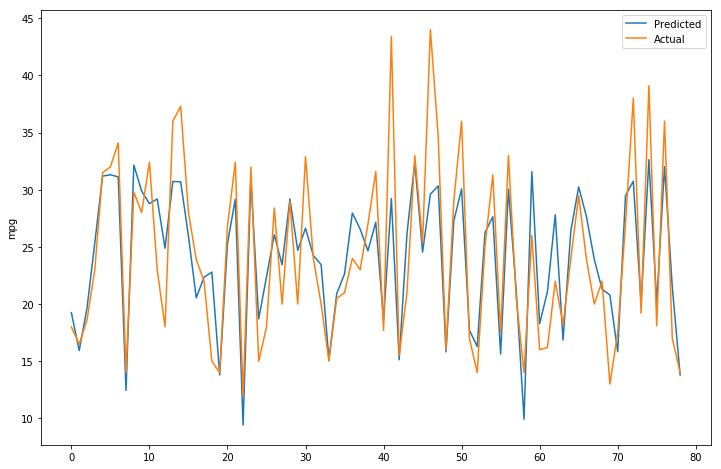

In [27]:
result_dict['mpg ~ kitchen_sink_svr'] = build_model(svr_reg,
                                                    'mpg',
                                                   ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)

In [28]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6998818429304218
Test score 0.6566263104347567

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7083919458775023
Test score 0.6800374445411652

Regression:  mpg ~ parsimonius_linear
Training score 0.6943283582192694
Test score 0.7557709356774329

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7019188409673598
Test score 0.7240164993308392

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6821859621209236
Test score 0.7087581864548806

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7057812310724829
Test score 0.707264924261483

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7104051004486713
Test score 0.691412951415717

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7110011551958635
Test score 0.6852537063850218

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.7100349396127534
Test score 0.6870510109148271

Regression:  mpg ~ kitchen_sink_svr
Tra

In [29]:
def kneighbors_reg(x_train, y_train, n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7476879717548102
Test_score :  0.762229608987594


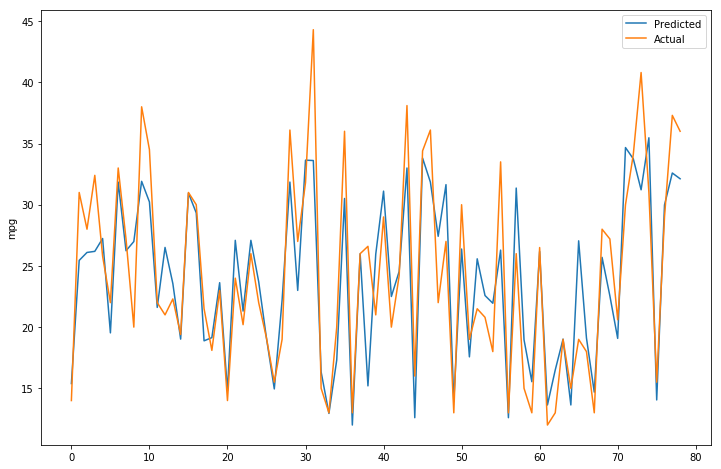

In [30]:
result_dict['mpg ~ kitchen_sink_kneighbors'] = build_model(kneighbors_reg,
                                                           'mpg',
                                                          ['cylinders',
                                                           'displacement',
                                                           'horsepower',
                                                           'weight',
                                                           'acceleration'],
                                                           automobile_df,
                                                           show_plot_Y=True)

In [31]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6998818429304218
Test score 0.6566263104347567

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7083919458775023
Test score 0.6800374445411652

Regression:  mpg ~ parsimonius_linear
Training score 0.6943283582192694
Test score 0.7557709356774329

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7019188409673598
Test score 0.7240164993308392

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6821859621209236
Test score 0.7087581864548806

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7057812310724829
Test score 0.707264924261483

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7104051004486713
Test score 0.691412951415717

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7110011551958635
Test score 0.6852537063850218

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.7100349396127534
Test score 0.6870510109148271

Regression:  mpg ~ kitchen_sink_svr
Tra

In [32]:
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)  

    return scaler.transform(x)

In [33]:
def sgd_reg(x_train, y_train, max_iter=10000, tol=1e-3):
    model = SGDRegressor(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7087759649105737
Test_score :  0.6907945778538851


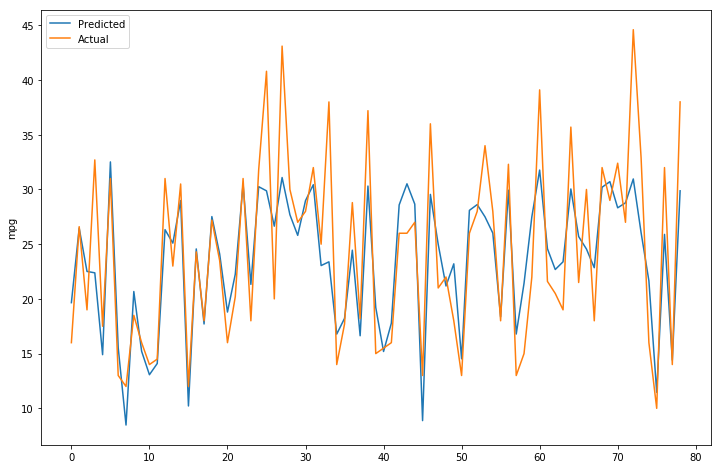

In [34]:
result_dict['mpg ~ kitchen_sink_sgd'] = build_model(sgd_reg,
                                                   'mpg',
                                                  ['cylinders',
                                                   'displacement',
                                                   'horsepower',
                                                   'weight',
                                                   'acceleration'],
                                                    automobile_df,
                                                    show_plot_Y=True,
                                                    preprocess_fn=apply_standard_scaler)

In [35]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6998818429304218
Test score 0.6566263104347567

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7083919458775023
Test score 0.6800374445411652

Regression:  mpg ~ parsimonius_linear
Training score 0.6943283582192694
Test score 0.7557709356774329

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7019188409673598
Test score 0.7240164993308392

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6821859621209236
Test score 0.7087581864548806

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7057812310724829
Test score 0.707264924261483

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7104051004486713
Test score 0.691412951415717

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7110011551958635
Test score 0.6852537063850218

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.7100349396127534
Test score 0.6870510109148271

Regression:  mpg ~ kitchen_sink_svr
Tra

In [36]:
def decision_tree_reg(x_train, y_train, max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7180262220902208
Test_score :  0.7872042005408728


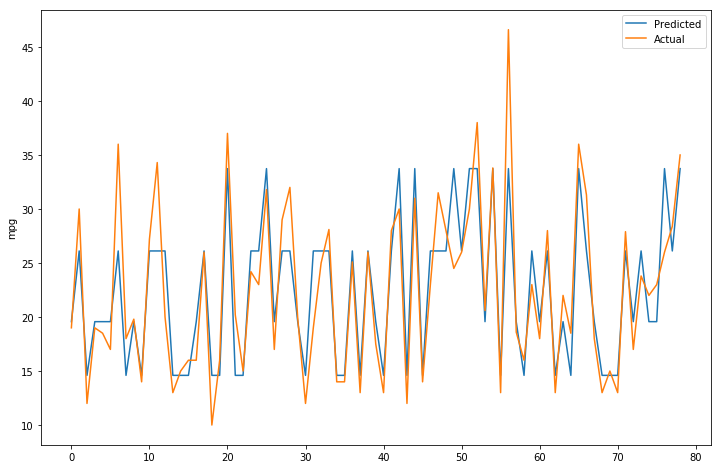

In [37]:
result_dict['mpg ~ kitchen_sink_decision_tree'] = build_model(decision_tree_reg,
                                                             'mpg',
                                                            ['cylinders',
                                                             'displacement',
                                                             'horsepower',
                                                             'weight',
                                                             'acceleration'],
                                                              automobile_df,
                                                              show_plot_Y=True)

In [38]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6998818429304218
Test score 0.6566263104347567

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7083919458775023
Test score 0.6800374445411652

Regression:  mpg ~ parsimonius_linear
Training score 0.6943283582192694
Test score 0.7557709356774329

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7019188409673598
Test score 0.7240164993308392

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6821859621209236
Test score 0.7087581864548806

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7057812310724829
Test score 0.707264924261483

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7104051004486713
Test score 0.691412951415717

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7110011551958635
Test score 0.6852537063850218

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.7100349396127534
Test score 0.6870510109148271

Regression:  mpg ~ kitchen_sink_svr
Tra

In [45]:
def lars_reg(x_train, y_train, n_nonzero_coefs=4):
    model = Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7183385501304523
Test_score :  0.6520196666204765


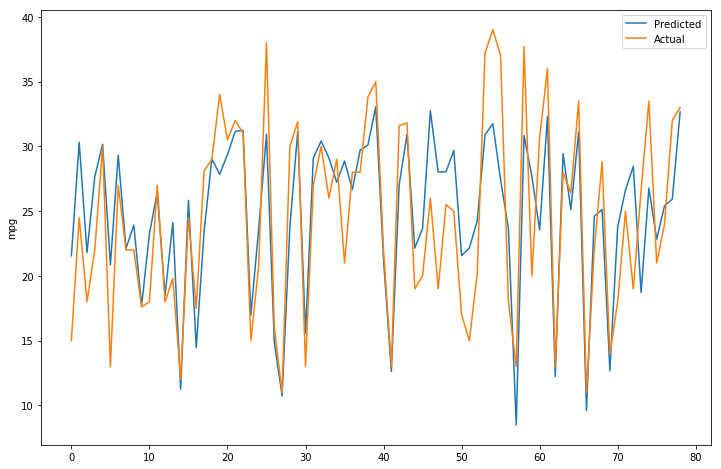

In [46]:
result_dict['mpg ~ kitchen_sink_lars'] = build_model(lars_reg,
                                                    'mpg',
                                                   ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)

In [47]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6998818429304218
Test score 0.6566263104347567

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7083919458775023
Test score 0.6800374445411652

Regression:  mpg ~ parsimonius_linear
Training score 0.6943283582192694
Test score 0.7557709356774329

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7019188409673598
Test score 0.7240164993308392

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6821859621209236
Test score 0.7087581864548806

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7057812310724829
Test score 0.707264924261483

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7104051004486713
Test score 0.691412951415717

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7110011551958635
Test score 0.6852537063850218

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.7100349396127534
Test score 0.6870510109148271

Regression:  mpg ~ kitchen_sink_svr
Tra